<a href="https://colab.research.google.com/github/swapnilprakashpatil/aai501_6proj/blob/Maurin/South_Korea_prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
#file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [ ]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [ ]:
# select the top 5 countries that we are interested in
# Filter rows for each country and run model
#This notebook is for South Korea
ROK_df = df2[df2['Country'] == 'Korea, South']

print(ROK_df)

           Country  Year  Expenditure_Constant_2022
3585  Korea, South  2000                20617.25258
3586  Korea, South  2001                21206.95318
3587  Korea, South  2002                21791.36457
3588  Korea, South  2003                22532.22157
3589  Korea, South  2004                23522.09972
3590  Korea, South  2005                25439.76764
3591  Korea, South  2006                26356.62518
3592  Korea, South  2007                27550.34272
3593  Korea, South  2008                29352.65461
3594  Korea, South  2009                31198.08420
3595  Korea, South  2010                31457.30768
3596  Korea, South  2011                31888.31927
3597  Korea, South  2012                32700.25802
3598  Korea, South  2013                33690.87750
3599  Korea, South  2014                35016.19826
3600  Korea, South  2015                36376.47770
3601  Korea, South  2016                37287.92608
3602  Korea, South  2017                37973.84371
3603  Korea,

In [ ]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
ROK_df2= ROK_df[['Year', 'Expenditure_Constant_2022']]


# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
ROK_df2 = ROK_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
ROK_df2['ds'] = to_datetime(ROK_df2['ds'], format='%Y')

# Fit the model by instantiating a new Prophet object and disable irrelevant seasonality
model = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False)

# Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds
model.fit(ROK_df2)

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/lwtok9dr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/yxnxvobv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2388', 'data', 'file=/tmp/tmpmn3_x7w9/lwtok9dr.json', 'init=/tmp/tmpmn3_x7w9/yxnxvobv.json', 'output', 'file=/tmp/tmpmn3_x7w9/prophet_model91ufuzzr/prophet_model-20241206033950.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:39:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:39:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Simulate the trend of expenditures for this country to 2030
future = model.make_future_dataframe(periods=8, freq = "YE", include_history= True)

#Make predictions on the future dataframe
forecast = model.predict(future) #This line is added to predict values and store them in forecast dataframe

#View predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds          yhat    yhat_lower    yhat_upper
0  2000-01-01  19943.135673  18911.610773  20928.690488
1  2001-01-01  21146.671763  20157.498365  22202.238253
2  2002-01-01  21779.893401  20720.457031  22824.343680
3  2003-01-01  22874.235330  21863.047953  23981.860233
4  2004-01-01  24429.709528  23446.445070  25448.866701
5  2005-01-01  25633.245620  24527.283388  26640.050529
6  2006-01-01  26266.467261  25252.155333  27223.982243
7  2007-01-01  27360.809193  26287.764459  28468.502121
8  2008-01-01  28916.283394  27907.314354  29942.939701
9  2009-01-01  30119.819488  29076.443966  31190.621329
10 2010-01-01  30753.041128  29714.427120  31808.660318
11 2011-01-01  31847.383061  30759.973441  32836.260093
12 2012-01-01  33403.239042  32427.383656  34483.777031
13 2013-01-01  34608.413746  33546.923462  35619.374154
14 2014-01-01  35244.318080  34193.413201  36253.852400
15 2015-01-01  36342.069099  35264.880532  37421.832995
16 2016-01-01  38041.790357  37011.153436  39075

Text(0.5, 1.0, 'South Korea, Military Spending Past and Predicted')

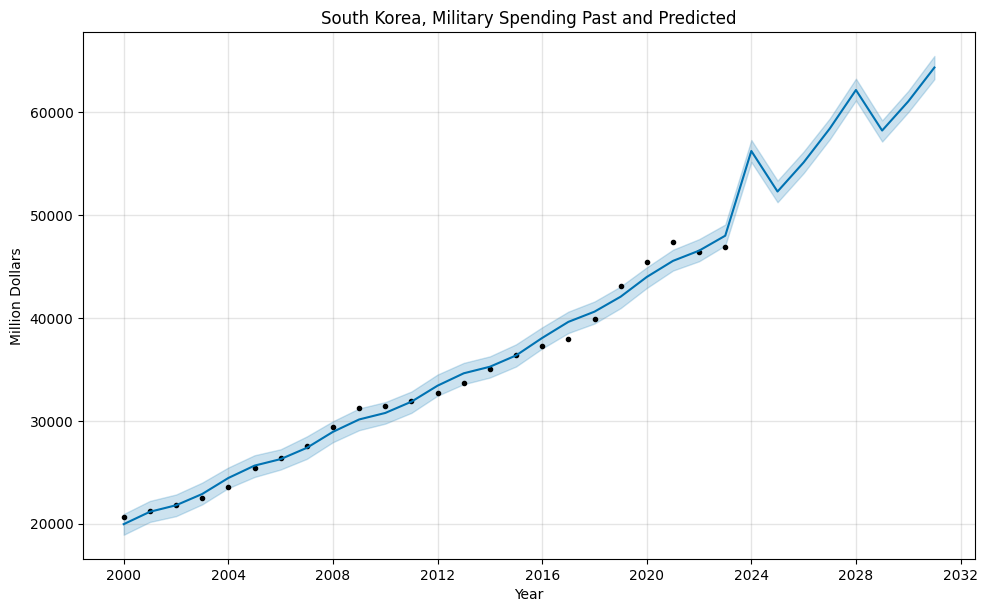

In [ ]:
fig1 = model.plot(forecast, xlabel= "Year", ylabel= "Million Dollars")
fig1.gca().set_title("South Korea, Military Spending Past and Predicted") # Set the title using the axes object

In [ ]:
#Evaluate the Prophet model using training and testing data sets

#split the data by a cut-off date of 2015 for training
cutoff_date = '2015-01-01'
train = ROK_df2[ROK_df2['ds'] < cutoff_date]
test = ROK_df2[ROK_df2['ds'] >= cutoff_date]


In [ ]:
#Fit the Prophet model on the training dataset
model_2 = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False) #add regressors if needed
model_2.fit(train[['ds', 'y']])


INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/zeocb87s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/9ky1whc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62277', 'data', 'file=/tmp/tmpmn3_x7w9/zeocb87s.json', 'init=/tmp/tmpmn3_x7w9/9ky1whc7.json', 'output', 'file=/tmp/tmpmn3_x7w9/prophet_modelrugwre9o/prophet_model-20241206034025.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:40:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Forecast on the Test Period

#create a future dataframe and generate future dates that match the test period
# Make predictions on the test period; named forecast_2 to keep separate from
# Prophet simulation above
forecast_2 = model_2.predict(test[['ds']]) #This line is added to predict values and store them in forecast dataframe

In [ ]:
#Evaluate the Model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], forecast_2['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

#Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['y'], forecast_2['yhat']))
print(f"Root Mean Squared Error (MSE): {rmse}")

#Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test['y'], forecast_2['yhat']) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Error (MAE): 3597.887510879375
Root Mean Squared Error (MSE): 4238.1391414368945
Mean Absolute Percentage Error (MAPE): 8.07%


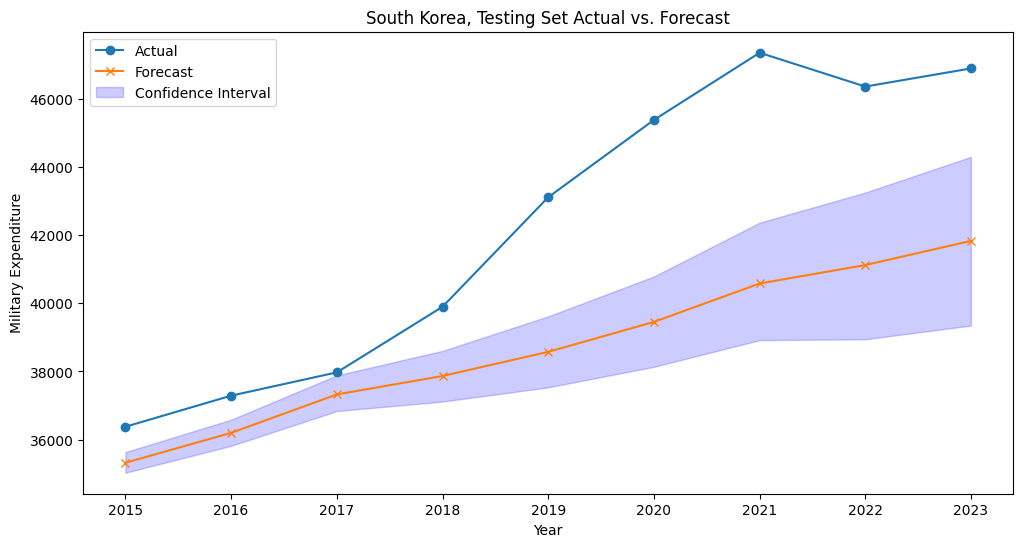

In [ ]:
#Visualize Results of Training and Testing

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker = 'o')
plt.plot(forecast_2['ds'], forecast_2['yhat'], label='Forecast', marker = 'x')
plt.fill_between(
    forecast_2['ds'],
    forecast_2['yhat_lower'],
    forecast_2['yhat_upper'],
    color='blue', alpha=0.2, label='Confidence Interval'
)
plt.xlabel('Year')
plt.ylabel('Military Expenditure')
plt.title('South Korea, Testing Set Actual vs. Forecast')
plt.legend()
plt.show()


In [ ]:
#evaluate the Prophet model using cross-validation function
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '5110 days', period = '365 days', horizon = '365 days',)


INFO:prophet:Making 9 forecasts with cutoffs between 2014-01-03 00:00:00 and 2022-01-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/ido7644l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/eodoerve.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87863', 'data', 'file=/tmp/tmpmn3_x7w9/ido7644l.json', 'init=/tmp/tmpmn3_x7w9/eodoerve.json', 'output', 'file=/tmp/tmpmn3_x7w9/prophet_modelm5c4ojaa/prophet_model-20241206034058.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:40:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmn3_x7w9/bdra07cw.json
DEBUG:cmdstanpy:input tempfi

In [ ]:
#show forcasts
#:There are 9 forecasts with cutoffs between 2014-01-03 and 2022-01-01
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,35318.152442,35015.483682,35637.762557,36376.47770,2014-01-03
1,2016-01-01,36971.924747,36507.440765,37411.191047,37287.92608,2015-01-03
2,2017-01-01,38316.064844,37842.298252,38800.446298,37973.84371,2016-01-03
3,2018-01-01,38879.661961,38433.656266,39329.950298,39899.70961,2017-01-02
4,2019-01-01,40367.451211,39762.982929,41011.674907,43113.96378,2018-01-02
5,2020-01-01,42231.239585,41346.355709,43190.259114,45382.45689,2019-01-02
6,2021-01-01,45234.246417,44356.416743,46141.710103,47359.24048,2020-01-02
7,2022-01-01,48350.075673,47634.851398,49026.170530,46365.42071,2021-01-01
8,2023-01-01,48946.561894,48064.128423,49825.340263,46897.50895,2022-01-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window = .5)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,364 days,4.657779e+06,2158.188726,1814.999664,0.041929,0.044634,0.043150,0.2500
1,365 days,4.327713e+06,2080.315579,1993.425408,0.043324,0.044281,0.043429,0.0625


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


Figure(1000x600)


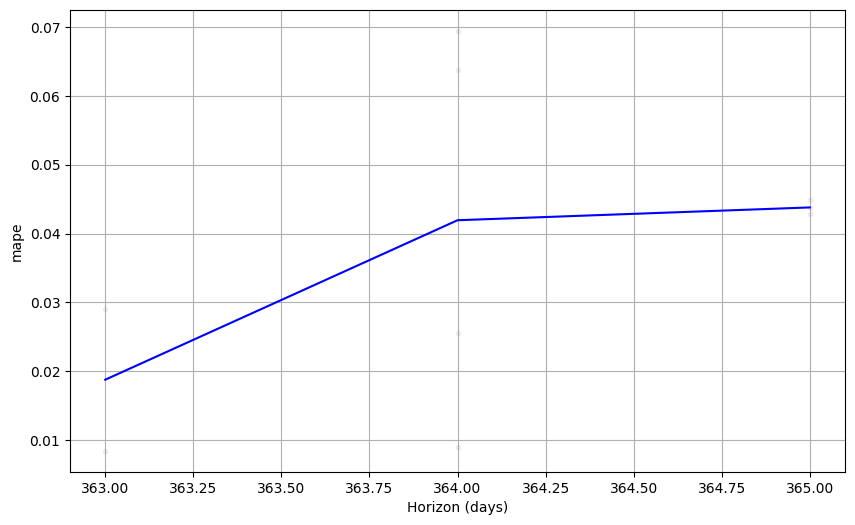

In [ ]:
#Visualize how the forcasting model performed
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
print(fig3)

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.